In [ ]:
pip install tensorflow


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
3186/3186 ━━━━━━━━━━━━━━━━━━━━ 295s 92ms/step - accuracy: 0.0477 - loss: 6.4060
Epoch 2/20
3186/3186 ━━━━━━━━━━━━━━━━━━━━ 314s 90ms/step - accuracy: 0.0768 - loss: 5.7015
Epoch 3/20
3186/3186 ━━━━━━━━━━━━━━━━━━━━ 326s 91ms/step - accuracy: 0.1211 - loss: 5.2417
Epoch 4/20
3186/3186 ━━━━━━━━━━━━━━━━━━━━ 322s 91ms/step - accuracy: 0.1462 - loss: 5.0547
Epoch 5/20
3186/3186 ━━━━━━━━━━━━━━━━━━━━ 322s 91ms/step - accuracy: 0.1863 - loss: 4.6591
Epoch 6/20
3186/3186 ━━━━━━━━━━━━━━━━━━━━ 321s 91ms/step - accuracy: 0.2258 - loss: 4.3030
Epoch 7/20
3186/3186 ━━━━━━━━━━━━━━━━━━━━ 321s 91ms/step - accuracy: 0.2739 - loss: 3.9128
Epoch 8/20
3186/3186 ━━━━━━━━━━━━━━━━━━━━ 323s 91ms/step - accuracy: 0.3146 - loss: 3.6021
Epoch 9/20
3186/3186 ━━━━━━━━━━━━━━━━━━━━ 324s 92ms/step - accuracy: 0.2800 - loss: 3.8035
Epoch 10/20
3186/3186 ━━━━━━━━━━━━━━━━━━━━ 292s 92ms/step - accuracy: 0.3524 - loss: 3.3088
Epoch 11/20
3186/3186 ━━━━━━━━━━━━━━━━━━━━ 322s 92ms/step - accuracy: 0.3034 - loss: 3.61

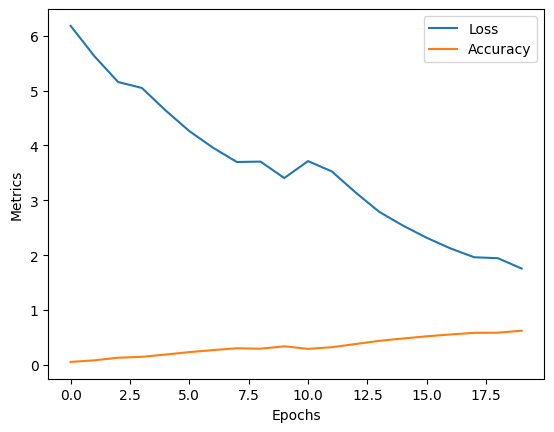

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12358 (\N{HIRAGANA LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12414 (\N{HIRAGANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython

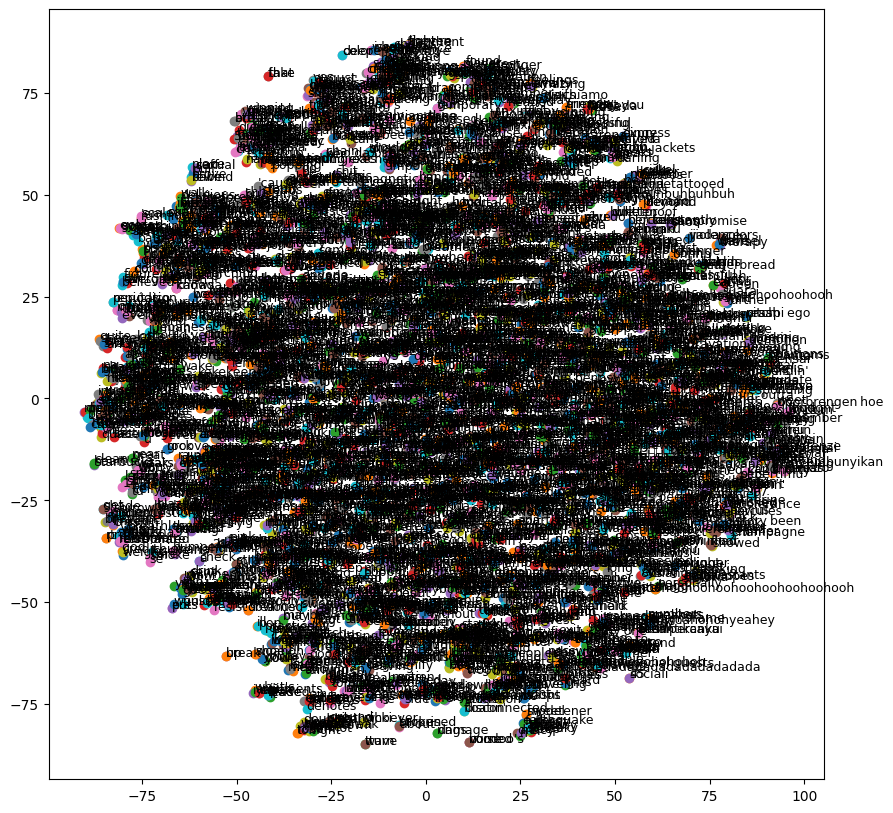

thought i'd end up  then my heart to be


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the dataset
def load_data(file_path):
    with open(file_path, 'r') as file:
        text = file.read().lower()
    return text

# Prepare the tokenizer and sequences
def prepare_sequences(text):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts([text])
    total_words = len(tokenizer.word_index) + 1
    input_sequences = []

    for line in text.split('\n'):
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i + 1]
            input_sequences.append(n_gram_sequence)

    max_sequence_length = max(len(x) for x in input_sequences)
    input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
    X, y = input_sequences[:, :-1], input_sequences[:, -1]
    y = tf.keras.utils.to_categorical(y, num_classes=total_words)

    return X, y, total_words, tokenizer, max_sequence_length

# Define the RNN model
def create_model(total_words, max_sequence_length):
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_length - 1))
    model.add(SimpleRNN(150))
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train the model and save training history for plotting
def train_model(model, X, y, epochs=50):
    history = model.fit(X, y, epochs=epochs, verbose=1)
    return history

# Generate next words
def generate_next_words(model, tokenizer, seed_text, max_sequence_length, next_words=5):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted_probs, axis=-1)
        predicted_word = tokenizer.index_word.get(predicted_word_index[0], '')
        seed_text += " " + predicted_word
    return seed_text

# Plot training history
def plot_training_history(history):
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.legend()
    plt.show()

# Visualize embeddings with t-SNE clustering
def plot_word_embeddings(model, tokenizer):
    embeddings = model.layers[0].get_weights()[0]  # Get the embedding layer weights
    words = list(tokenizer.word_index.keys())
    word_embeddings = embeddings[:len(words)]  # Limit embeddings to words in tokenizer

    tsne = TSNE(n_components=2, random_state=0, perplexity=5)
    tsne_embeddings = tsne.fit_transform(word_embeddings)

    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words):
        plt.scatter(tsne_embeddings[i, 0], tsne_embeddings[i, 1])
        plt.annotate(word, (tsne_embeddings[i, 0], tsne_embeddings[i, 1]), fontsize=9)
    plt.show()

# Example usage
file_path = 'ArianaGrande.csv'  # Replace with your text file path
text_data = load_data(file_path)
X, y, total_words, tokenizer, max_sequence_length = prepare_sequences(text_data)

model = create_model(total_words, max_sequence_length)
history = train_model(model, X, y, epochs=20)

# Plot training metrics
plot_training_history(history)

# Plot word embeddings with t-SNE
plot_word_embeddings(model, tokenizer)

# Generate text
seed_text = "thought i'd end up "
print(generate_next_words(model, tokenizer, seed_text, max_sequence_length))